# 로지스틱 회귀분석

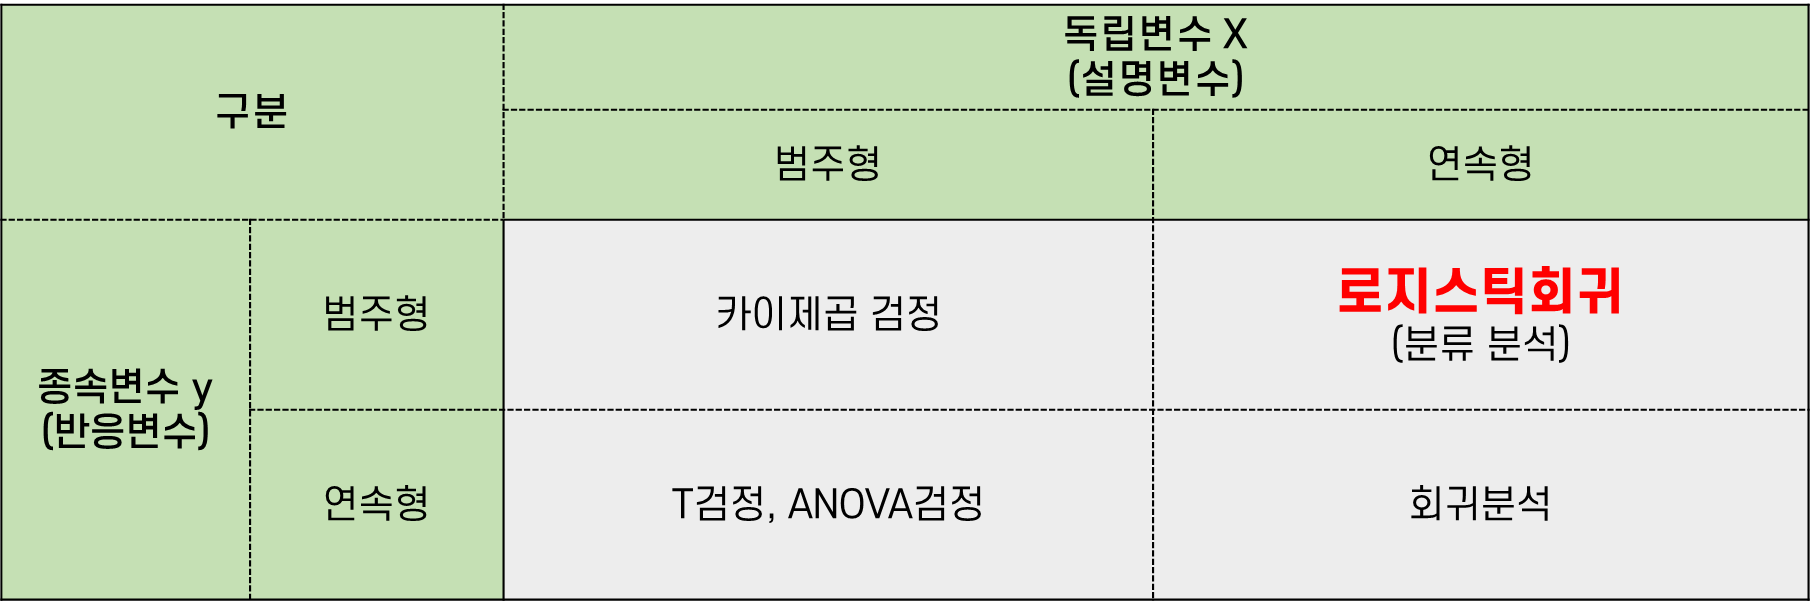


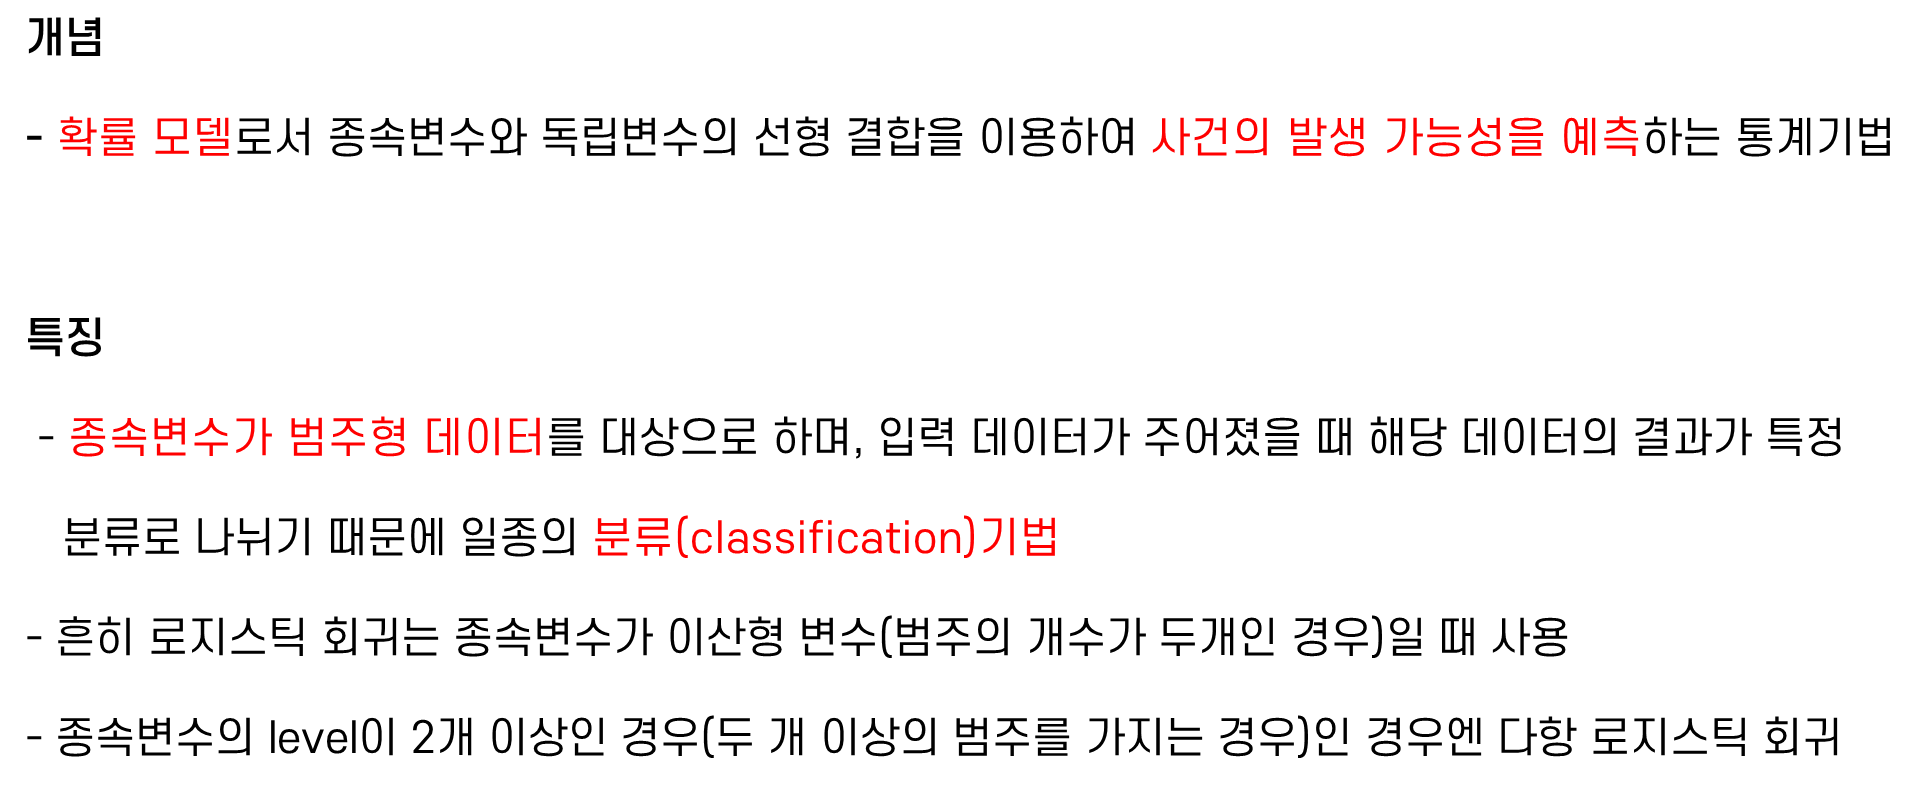

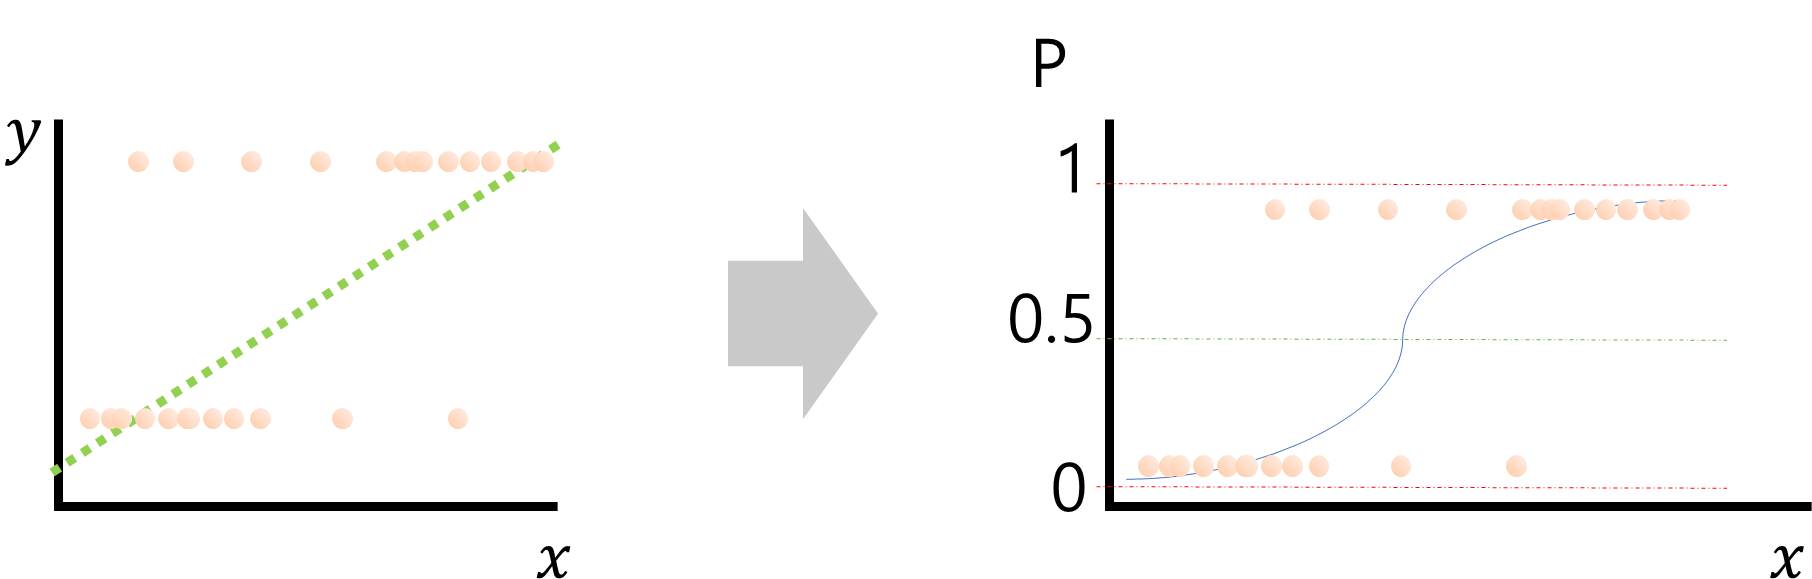

![python image2](./로지스틱_개념.png)

__[예제 1-1]__   
titanic 데이터를 분할하고, train 데이터로 로지스틱 회귀모델을 만들어보자 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
df_t = pd.read_csv('C:/adp/data/titanic.csv')
df_t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
## 전처리 
# 결측치 제거 
df_t['age'] = df_t['age'].fillna(df_t['age'].median())

In [5]:
df_t['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [6]:
df_t['embark_town'].value_counts().index[0]

'Southampton'

In [7]:
df_t['embark_town']  = df_t['embark_town'].fillna(df_t['embark_town'].value_counts().index[0])

In [8]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [9]:
# 더미변수화 및 중복 컬럼 제거 
df_t = df_t.drop(['pclass','embarked'],axis=1)

df_t = pd.get_dummies(df_t, columns = ['sex','class','embark_town'])

df_t.tail()

,survived,age,sibsp,parch,fare,who,adult_male,deck,alive,alone,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
886,0,27.0,0,0,13.00,man,True,NaN,no,True,0,1,0,1,0,0,0,1
887,1,19.0,0,0,30.00,woman,False,B,yes,True,1,0,1,0,0,0,0,1
888,0,28.0,1,2,23.45,woman,False,NaN,no,False,1,0,0,0,1,0,0,1
889,1,26.0,0,0,30.00,man,True,C,yes,True,0,1,1,0,0,1,0,0
890,0,32.0,0,0,7.75,man,True,NaN,no,True,0,1,0,0,1,0,1,0


In [10]:
## import statsmodels.api as sm 특성 상
float_list = ["survived", "age", "sibsp", "parch", "fare", "sex_female", "sex_male", "class_First", "class_Second", "class_Third", "embark_town_Cherbourg", "embark_town_Queenstown", "embark_town_Southampton"]
df_t = df_t[float_list].astype(float)
# df_t[float_list]
df_t.tail()

,survived,age,sibsp,parch,fare,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
886,0.0,27.0,0.0,0.0,13.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
887,1.0,19.0,0.0,0.0,30.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,0.0,28.0,1.0,2.0,23.45,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1.0,26.0,0.0,0.0,30.00,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
890,0.0,32.0,0.0,0.0,7.75,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [11]:
# 설명변수(X), 타겟변수 (y) 분리
X = df_t.drop(['survived', 'sex_male'],axis=1)
y = df_t['survived']

In [12]:
y.value_counts()

0.0    549
1.0    342
Name: survived, dtype: int64

In [13]:
## 홀드아웃 기법 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.2, random_state=2020) # stratify : 층화추출

In [14]:
print(y_train.value_counts())
print(y_test.value_counts())

0.0    439
1.0    273
Name: survived, dtype: int64
0.0    110
1.0     69
Name: survived, dtype: int64


In [15]:
# 로지스틱회귀모형 모델링
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.435894
         Iterations 6


In [16]:
help(sm.Logit)

Help on class Logit in module statsmodels.discrete.discrete_model:

class Logit(BinaryModel)
 |  Logit(endog, exog, check_rank=True, **kwargs)
 |  
 |  Logit Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  check_rank : bool
 |      Check exog rank to determine model degrees of freedom. Default is
 |      True. Setting to False reduces model initialization time when
 |      exog.shape[1] is large.
 |  
 |  
 | 

In [17]:
print(result.summary() )

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            9
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.3452
Time:                        19:25:22   Log-Likelihood:                -310.36
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 4.236e-65
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.0398      0.009     -4.496      0.000      -0.057      -0.022
sibsp                      -0.2997      0.118     -2.548      0.011      -0.530      -0.069


In [19]:
# 성능 척도 AIC
print("model AIC: ", "{:.5f}".format(result.aic))

model AIC:  640.71295


__[예제 1-2]__     
회귀계수의 p-value가 유의수준 0.05보다 높게 나타나는 변수가 많으므로,    
단계적 선택법을 이용하여 로지스틱 회귀분석을 다시 실시하자

In [20]:
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index

    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model



'''
단계적 선택법
'''

def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = [X.columns[0]]
    Smodel_before = processSubset(X,y,predictors)['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors]
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors]
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [21]:
Stepwise_best_model = Stepwise_model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.664126
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.661913
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662992
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.621623
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529373
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.613957
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.658206
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.611853
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650740
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664020
  

In [22]:
Stepwise_best_model.aic

636.8440124785152

In [23]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            5
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.3409
Time:                        19:34:06   Log-Likelihood:                -312.42
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 1.058e-67
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                      -0.0381      0.006     -6.630      0.000      -0.049      -0.027
sex_female                2.7516      0.216     12.745      0.000       2.328       3.175
class_Third              -1.2145      0.214     -5.687      0.000      -1.633      -0.796
class_First               0.9032      0.291      3.100      0.002       0.332       1.474
sibsp                    -0.3109      0.108     -2.883      0.004      -0.522      -0.100
embark_town_Cherbourg     0.4864      0.262      1.855      0.064      -0.027       1.000
=========================================================================================
"""

In [19]:
# 로지스틱 회귀모델로 적합한 회귀계수 확인

##단계적 선택법 
print(Stepwise_best_model.params)

adult_male              -3.312166
class_First              3.153808
class_Second             2.469512
sibsp                   -0.514293
class_Third              1.349336
age                     -0.018594
parch                   -0.352575
fare                     0.004931
embark_town_Cherbourg    0.464423
dtype: float64


In [20]:
# 적합한 회귀계수로 오즈비 확인

# adult_male 일때,  adult_male이 아닌 사람에 비해 생존확률이 99 % 감소한다 
# class_First일때, class_Second일 때보다 생존확률은 약 2배 증가 , class_Third일 때보다 약 6배 증가 
# sibsp가 1단위 증가할 때 생존확률 40% 감소 
# fare가 1단위 증가할 때, 생존확률 0.004% 증가 

np.exp(Stepwise_best_model.params)    

adult_male                0.036437
class_First              23.425090
class_Second             11.816675
sibsp                     0.597923
class_Third               3.854864
age                       0.981578
parch                     0.702876
fare                      1.004943
embark_town_Cherbourg     1.591095
dtype: float64

## 6.3.1 로지스틱 회귀분석 : 분류분석으로 활용하기

In [28]:
Stepwise_best_model.params.index

Index(['age', 'sex_female', 'class_Third', 'class_First', 'sibsp',
       'embark_town_Cherbourg'],
      dtype='object')

In [29]:
X_test = X_test[Stepwise_best_model.params.index]

In [26]:
y_test

560    0.0
130    0.0
551    0.0
587    1.0
2      1.0
      ... 
818    0.0
113    0.0
605    0.0
642    0.0
206    0.0
Name: survived, Length: 179, dtype: float64

In [30]:
# 예측하기 predict
y_pred = Stepwise_best_model.predict(X_test)
y_pred

560    0.092671
130    0.120728
551    0.263302
587    0.230118
2      0.633296
         ...   
818    0.054524
113    0.613997
605    0.052293
642    0.629089
206    0.060384
Length: 179, dtype: float64

In [31]:
# 임계값을 설정해서 예측값을 이진분류로 반환하기
def cut_off(y, threshold):
    Y = y.copy()
    Y[Y>threshold] = 1
    Y[Y<=threshold] = 0
    return(Y.astype(int))
y_pred = cut_off(y_pred, 0.5)  #임계값을 0.5로 설정
y_pred

560    0
130    0
551    0
587    0
2      1
      ..
818    0
113    1
605    0
642    1
206    0
Length: 179, dtype: int32

![python image2](./혼동행렬.png)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [33]:
# 혼동행렬
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[93 17]
 [20 49]]


In [34]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [28]:
print("Acuuracy : ", accuracy_score(y_test, y_pred))
print("Sensitivity(recall) : ", recall_score(y_test, y_pred))
print("precision_score : ", precision_score(y_test, y_pred))
print("f1_score : ", f1_score(y_test, y_pred))

Acuuracy :  0.7821229050279329
Sensitivity(recall) :  0.6956521739130435
precision_score :  0.7272727272727273
f1_score :  0.711111111111111


## 분류분석 평가지표 

### ROC 곡선
- x축은 FPR(1-특이도), y축은 재현율을 가지는 그래프
- TPR(민감도)은 1 이고, FPR(1-특이도)는 0인 경우 가장 이상적  
- 거짓 양성 비율(False Positive Rate;FPR) 의미
  
|이름|의미|
|---|---|
|민감도(재현율)|실제 True일 때 True라고 예측하는 비율|
|특이도|실제 False일 때 False라고 예측하는 비율|
|FPR| FP/TN+FP는 실제로는 음성인 것과 양성으로 잘못 예측한 것의 비율

### 6.3.2.2 AUC
- ROC 곡선의 아래 면적을 계산한 것으로 값이 클수록 모델의 성능이 좋다고 판단 가능

<br>

roc_auc_score
- binary 분류일 때 : roc_auc_score(Y, clf.predict_proba(X)[:, 1])
- 다중 클래스 분류일 때 : roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')
- 여러 개의 라벨을 분류할 때 : roc_auc_score(y, y_pred, average=None)

In [36]:
# 확률로 예측하기
y_pred_proba = Stepwise_best_model.predict(X_test)
y_pred_proba


560    0.092671
130    0.120728
551    0.263302
587    0.230118
2      0.633296
         ...   
818    0.054524
113    0.613997
605    0.052293
642    0.629089
206    0.060384
Length: 179, dtype: float64

__[예제 1-3]__    
ROC 커브 그리기 및 ROC_AUC 산출하기

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# ROC 커브 시각화

def draw_roc(test_y, pred_y, model_name):
    fpr, tpr, thr = roc_curve(test_y, pred_y)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 1
    # 꺽은선 그래프
    plt.plot(fpr, tpr, color = 'darkorange',
            lw = lw, label = "ROC curve (area = %0.2f)" % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title("Receiver operating characteristic {}".format(model_name))
#     plt.legend(loc = 'lower right')
#     plt.ion()
#     plt.tight_layout()
#     plt.show()

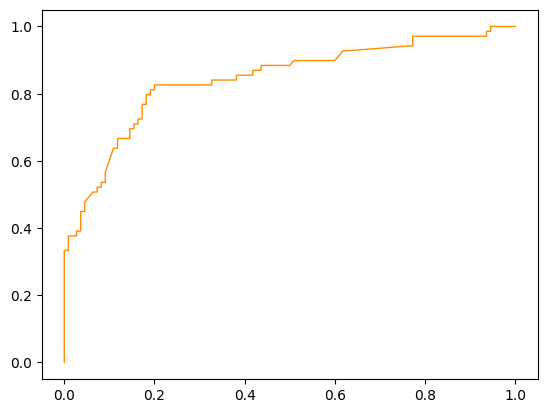

In [49]:
draw_roc(y_test, y_pred_proba, "LogisticRegression")

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.8440052700922266